#Section 1. Business Understanding
We will asking these several quesion to find an ingight about current boston airbnb situation
- What is the most common neighbor in the dataset
- In which month, do people usually spend on vacation?
- What is the distribution of homestay prices in Boston?
- Which factor will affect the price most?

In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

#Section 2. Data Understanding

## 2.1) Data gathering

In [133]:
cal = pd.read_csv('calendar.csv.zip')
lst = pd.read_csv('listings.csv.zip')
rev = pd.read_csv('reviews.csv.zip')

In [134]:
cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [135]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [136]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [137]:
# print the shape of each table
print(cal.shape)
print(lst.shape)
print(rev.shape)

(1308890, 4)
(3585, 95)
(68275, 6)


## 2.2) Null value analysis

In [138]:
#Check null percentage 
null_col =lst.loc[:,list(lst.loc[:,lst.isnull().any()].columns)]
null_col.isnull().sum()/(len(lst))*100

summary                           3.988842
space                            29.483961
neighborhood_overview            39.470014
notes                            55.090656
transit                          35.983264
access                           41.534170
interaction                      43.347280
house_rules                      33.249651
thumbnail_url                    16.708508
medium_url                       16.708508
xl_picture_url                   16.708508
host_location                     0.306834
host_about                       36.513250
host_response_time               13.138075
host_response_rate               13.138075
host_acceptance_rate             13.138075
host_neighbourhood                9.456067
neighbourhood                    15.146444
neighbourhood_group_cleansed    100.000000
city                              0.055788
zipcode                           1.059972
market                            0.390516
property_type                     0.083682
bathrooms  

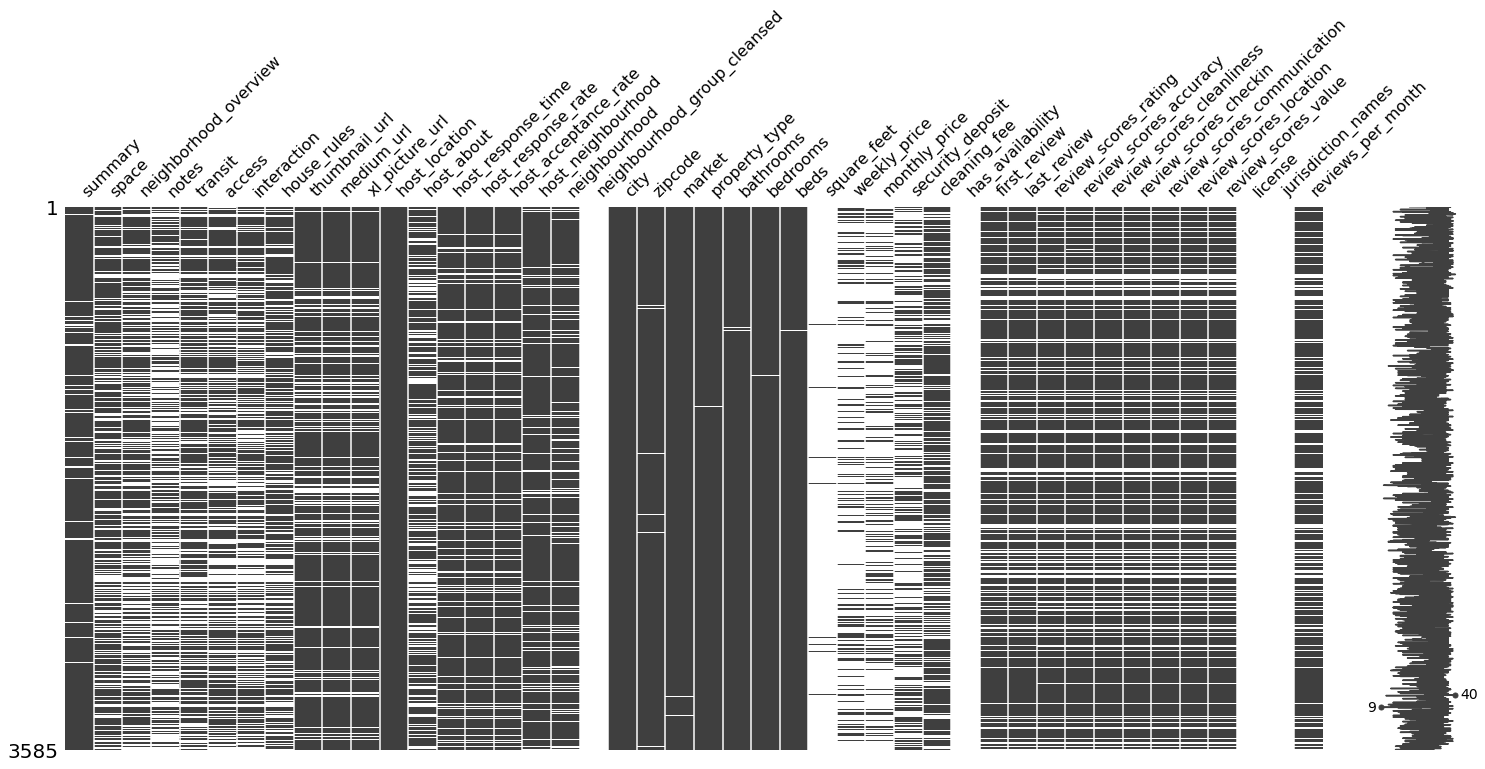

In [139]:
# use missingno for better visualization white space = null
import missingno
df = lst.columns[lst.isnull().any()].tolist()
missingno.matrix(lst[df])

In [140]:
lst['price'].isnull().sum()

0

- Conclusion about null distribution in dataset: 
  - There are a lot of column with missing value but currently we will ignore that.
  - At least our target is not null

#Section 3. Data preparation

Building utility fuction create plot for our question

In [141]:
#convert price to number 
lst['price']=lst['price'].str.replace(',','').str.replace('$','').astype('float')

<ipython-input-141-ed5b4b956c0c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lst['price']=lst['price'].str.replace(',','').str.replace('$','').astype('float')


In [158]:
figure(figsize=(8, 6), dpi=80)
def plot_bar(col, title):
  '''
  returns bar chart of the given columns

  input:
        col: str - name of the columns
        title : str - title of the chart 
  output: 
        return graph: mtplotlib object-  bar chart of the given columns
  '''
  
  val = lst[col].value_counts()
  plt.title(title)
  graph = sns.barplot(y=val.index, x=val)
  return graph



<Figure size 640x480 with 0 Axes>

In [143]:
#Let's look at price range and distribution
figure(figsize=(8, 6), dpi=80)
def hist_plot(col, title, xtitle):

  '''
   returns histogram of the given columns

  input:
        col: str - name of the columns
        title: str -  title of the chart 
        xtitle: str -  axis name of the chart 
  output: 
        graph: matplotlib object - histogram of the given columns
  '''
  plt.title(title)
  plt.xlabel(xtitle)
  graph = sns.histplot(lst[col])
  return graph 
  


<Figure size 640x480 with 0 Axes>

From a data scietist perspective. it is clearly that our data has an outlier  however, I'm not a house expert so I will not delete that to make our data unbias, who know maybe there is a luxury 6 stars hotel with 4000$ per room actually existed

In [144]:
#covenrt to date time data
rev['date'] = pd.to_datetime(rev.date)  
month = rev['date'].dt.month 
rev['Month'] = month

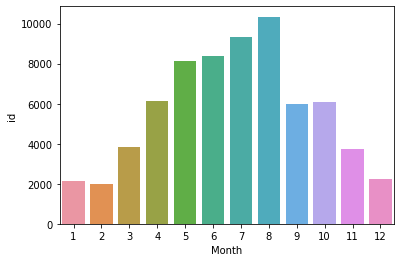

In [145]:
def plot_freq():
  '''
   returns frequency of the of the renting rate by month
   input : no parameter is required
   output: 
          graph: matplotlib object -  frequency of the of the renting by month
  '''
  Month = rev.groupby('Month').agg('count')['id'].sort_values(ascending=False).to_frame().reset_index()
  graph = sns.barplot(data=Month,x= 'Month', y='id' )
  return graph

#Section 4 Data Modeling
we will use lightbgm to build a regression model to predict house price. 
We will be using both number and categorical columns to create spare feature for predicting price. 
after getting all the feature we need, we will drop na and create dummy variable for category colmuns

In [146]:
# select number columns
num = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 
              'guests_included', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']
# select category columns
cat = ['neighbourhood', 'require_guest_phone_verification', 'bed_type', 'room_type', 'host_is_superhost', 'cancellation_policy', 'property_type', 'is_location_exact']


In [147]:
data = lst.select_dtypes(include=['int64', 'float64'])[num]
data[cat] = lst[cat]
price = data.copy()
price = price.dropna()    # drop na 
price = pd.get_dummies(price)  # create dummy variable

In [148]:
# Split data: to train and test 
y = price['price']
X = price.drop('price',  axis =1 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [149]:
X_train

,latitude,longitude,accommodates,bedrooms,bathrooms,beds,guests_included,availability_30,availability_60,availability_90,...,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,is_location_exact_f,is_location_exact_t
1174,42.346433,-71.070916,2,1.0,1.0,1.0,2,2,9,31,...,0,0,0,0,0,0,0,0,0,1
422,42.334678,-71.102513,4,2.0,1.0,2.0,1,29,59,89,...,0,0,0,0,0,0,0,0,0,1
1933,42.360520,-71.064014,3,1.0,1.0,2.0,1,0,6,9,...,0,0,0,0,0,0,0,0,0,1
368,42.310009,-71.101764,2,1.0,1.0,1.0,2,2,8,34,...,0,0,0,0,0,0,0,0,0,1
1998,42.356681,-71.071558,2,1.0,1.0,1.0,1,13,40,59,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,42.367098,-71.033349,3,0.0,1.0,2.0,1,0,0,7,...,0,0,0,0,0,0,0,0,0,1
59,42.316912,-71.113025,2,1.0,1.0,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1109,42.344032,-71.074080,4,2.0,2.5,2.0,1,29,59,89,...,0,0,0,1,0,0,0,0,0,1
2798,42.301693,-71.062637,4,1.0,2.0,1.0,1,0,13,43,...,0,0,0,1,0,0,0,0,0,1


In [150]:

!pip install lightgbm 
import lightgbm as lgb


params = {
    'task': 'train', 
    'boosting': 'gbdt',        # parameter settings
    'objective': 'regression',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'metric': {'l2','l1'},
    'verbose': -1,
    'max_depth' :8
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

y_preds = model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, y_preds)
rmse = mse**(0.5)
print(r2_score(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[1]	valid_0's l1: 81.3346	valid_0's l2: 13359.8
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l1: 76.3976	valid_0's l2: 12026.4
[3]	valid_0's l1: 72.1046	valid_0's l2: 10940
[4]	valid_0's l1: 68.4273	valid_0's l2: 10069.2
[5]	valid_0's l1: 65.0509	valid_0's l2: 9296.12
[6]	valid_0's l1: 61.8165	valid_0's l2: 8514.7
[7]	valid_0's l1: 59.3336	valid_0's l2: 8009
[8]	valid_0's l1: 56.9961	valid_0's l2: 7544.07
[9]	valid_0's l1: 55.0131	valid_0's l2: 7180.37
[10]	valid_0's l1: 53.2889	valid_0's l2: 6860.98
[11]	valid_0's l1: 51.6393	valid_0's l2: 6526.39
[12]	valid_0's l1: 50.422	valid_0's l2: 6309.45
[13]	valid_0's l1: 49.1714	valid_0's l2: 6115.18
[14]	valid_0's l1: 48.2393	valid_0's l2: 5954.76
[15]	valid_0's l1: 47.2453	valid_0's l2: 5772.28
[16]	valid_0's l1: 46.4953	valid_0's l2: 5661.3
[17]	valid_0's l1: 45.6526	valid_0's l2: 5526.06
[18]	valid_0's l1: 45.0

In [151]:
print(r2_score(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))

0.6863002065048688
4674.4973804578085
41.25616857149495


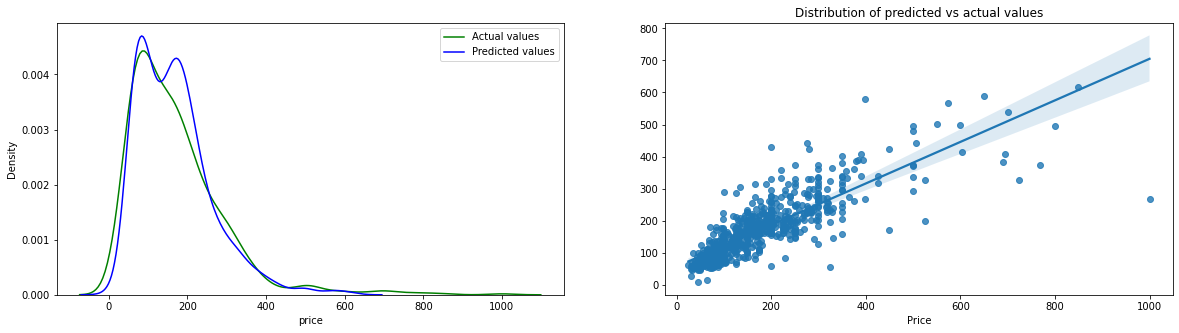

In [152]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sns.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

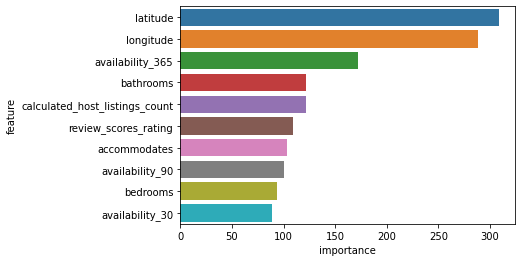

In [153]:
def ploting_top_feature(k):
  '''
  return top K important feature
  input: 
          k: int - k most importance feature
  '''
  df_feature_importance = (
      pd.DataFrame({
          'feature': model.feature_name(),
          'importance': model.feature_importance(),
      })
      .sort_values('importance', ascending=False)
  )
  top_feature=df_feature_importance.iloc[:k,:]
  return sns.barplot( x=top_feature['importance'],y=top_feature['feature'])\


#Section 5: Answering question and conclusion

##a) What is the most common neighbor in the Boston

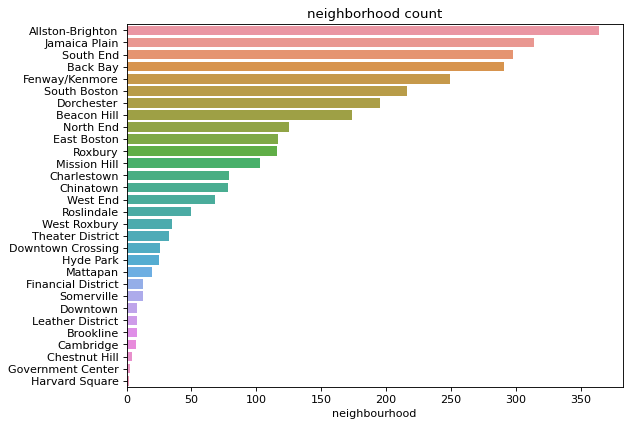

In [159]:
figure(figsize=(8, 6), dpi=80)
plot_bar('neighbourhood', "neighborhood count")

As we can see, Most of our homestay located in Allston - Brighton neighbor, and somewhat in near Jamaica Plain, South End and Back Bay

## b) In which month, do people usually spend on vacation?

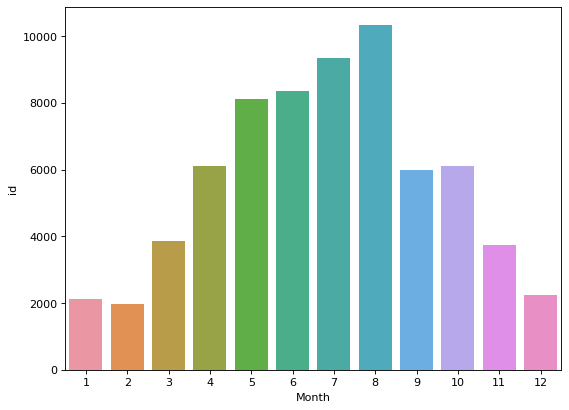

In [156]:
figure(figsize=(8, 6), dpi=80)
plot_freq()

It is a common thing that people usually spend their vacation in summer, usually from May to August. By this information, Homestay can plan ahead their schedule for better service for their customer.

##c) What is the distribution of homestay prices in Boston?

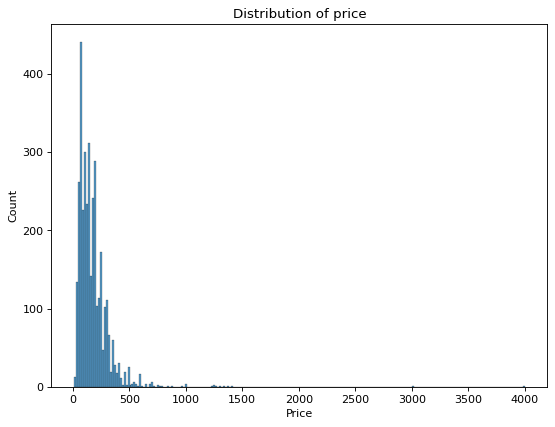

In [154]:
title = 'Distribution of price'
xtitle='Price'
figure(figsize=(8, 6), dpi=80)
hist_plot('price',title, xtitle)

Most of our price concentrated at around 0–500, few place rise over 1000 -1500. Noticeably, there is a place with the price 4000. From a data scientist perspective. It is clearly that our data has an outlier however, I'm not a house expert so I will not delete that to make our data unbiased, who know maybe there is a luxury 6 stars hotel with 4000 per room actually existed

##d) Which factor will affect the price most?

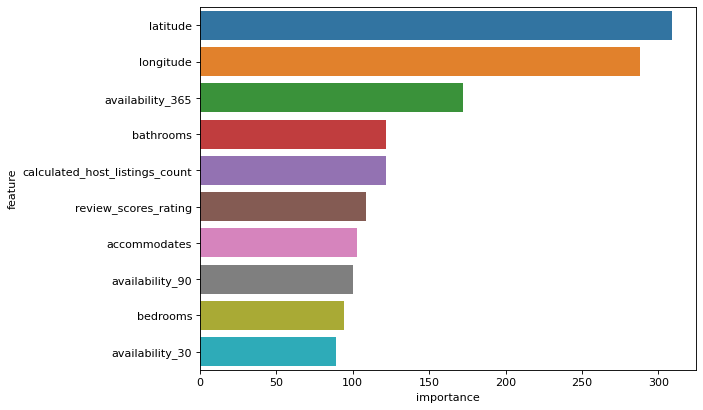

In [157]:
figure(figsize=(8, 6), dpi=80)
ploting_top_feature(10)

Interestingly, Latitude and Longitude has the place in rank 1 and 2, which mean the price clearly affected by the location of homestay, the third is the availability and the fourth is bathrooms.

detailed about conclusion and analysed will be included in my blog [here](https://medium.com/@vuminhduc1809/airbnb-house-price-prediction-bcd3db4f72a)